# Bird Tracking
https://lifewatch.inbo.be/blog/posts/bird-tracking-data-published.html <br>
LifeWatch INBO project <br>
Will use migration data for three gulls - Eric, Nico, and Sanne <br>
8 columns - latitude, longitude, altitude, and time stamps 
### GPS trackers 
on the birds

In [186]:
import pandas as pd

In [187]:
birddata = pd.read_csv("bird_tracking.csv")
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [188]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


Latitude and Longitude are coordinates along a surface of a sphere- 2-D plots = strong distrotions for the flight trajectories

#### Visualization

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

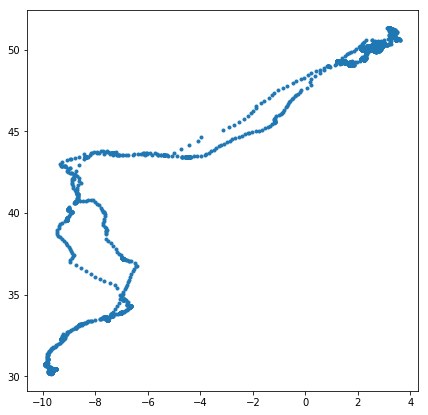

In [190]:
ix = birddata.bird_name == "Eric"
x,y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

In [191]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

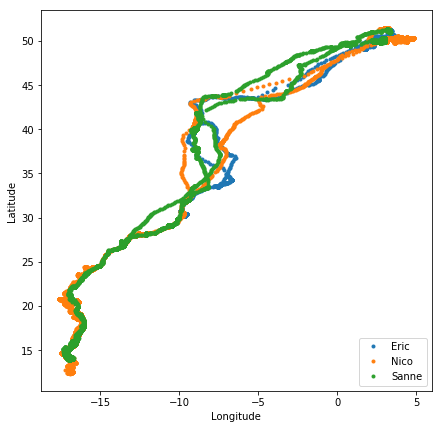

In [192]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

#### Examining Flight Speed

speed data - estimates of two dimensional speeds of the bords. How flast flying on a 2D plane on a local approximation t othe curved surface of the earth.

Have some null or NaN can use numpy nan

(array([ 3.,  1.,  0.,  0.,  1.,  2.,  2.,  0.,  0.,  1.]),
 array([ 0.15      ,  0.59422108,  1.03844216,  1.48266324,  1.92688432,
         2.3711054 ,  2.81532648,  3.25954756,  3.70376864,  4.14798972,
         4.5922108 ]),
 <a list of 10 Patch objects>)

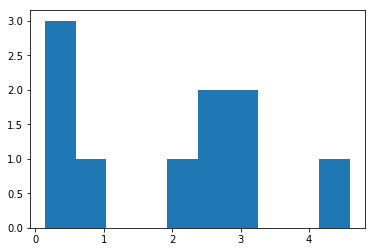

In [117]:
plt.hist(speed[:10])
# histogram of the first 10 rows 

In [118]:
import numpy as np

In [193]:
np.isnan(speed).any()
#.any() at least one meets criteria NaN in column speed
# handy!

True

In [194]:
np.sum(np.isnan(speed))

85

In [195]:
ind = np.isnan(speed)
ind.sum()

85

can take a bitwise complement of the ind array - turns each occurence of true to a false and vice versa with `~`

In [196]:
#  ~ind

In [197]:
np.sum(np.isnan(speed)==False)

19710

In [198]:
birddata.speed_2d.shape

(61920L,)

In [199]:
nans = np.sum(np.isnan(speed))
birddata.speed_2d.shape - nans

array([61835], dtype=int64)

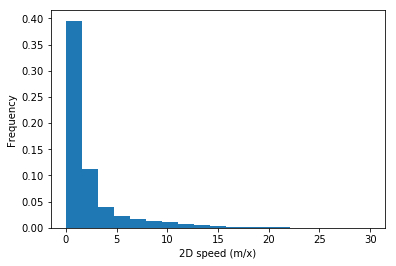

In [200]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), normed=True)
# only include entries for which ind is not equal to true
# bin starts at 0 and ends at 30
# y-axis normalized - integral over the histogram = 1
plt.xlabel("2D speed (m/x)")
plt.ylabel("Frequency");

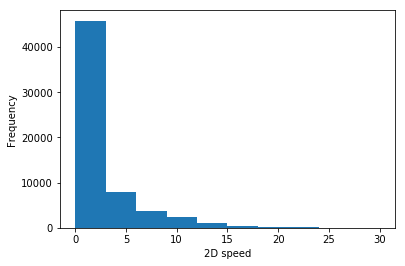

In [201]:
# pandas way
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2D speed");
plt.show()
# pandas handles NaNs under the hood!

#### Datetime
temporal data - data with time - need ot do arithmetical operations with date and timestamps. <br>
<b> datetime </b>

In [202]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

convert to daytime object

In [203]:
import datetime

In [204]:
datetime.datetime.today()

datetime.datetime(2017, 6, 15, 19, 19, 55, 523000)

In [205]:
time_1 = datetime.datetime.today()

In [207]:
time_2 = datetime.datetime.today()

In [208]:
time_2 - time_1 
# date time time delta object

datetime.timedelta(0, 5, 530000)

To computer how much time has passed between any two observations in the dataset, first have to convert the timestamps to datetime objects. <br>
UTC - coordinated universal time +## offsets

In [209]:
date_str = birddata.date_time[0]
print (type(date_str))
print (date_str)
print (date_str[:-3])

<type 'str'>
2013-08-15 00:18:08+00
2013-08-15 00:18:08


In [210]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [211]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                     (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
print (timestamps[0:3])
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)
birddata.head()

[datetime.datetime(2013, 8, 15, 0, 18, 8), datetime.datetime(2013, 8, 15, 0, 48, 7), datetime.datetime(2013, 8, 15, 1, 17, 58)]


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [212]:
birddata.timestamp[4] - birddata.timestamp[3]
# row 4 - row 3

Timedelta('0 days 00:29:51')

In [213]:
# amount of time elapsed from the beginning of data collection
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]
# going over time sequence one object at at at time
# for each object time is different where times [0] from the beginning
print (elapsed_time[0])
print (elapsed_time[1000])
print "days passed: ",(elapsed_time[1000] / datetime.timedelta(days=1))
print "hours passed: ",(elapsed_time[1000] / datetime.timedelta(hours=1))

0 days 00:00:00
12 days 02:02:00
days passed:  12.0847222222
hours passed:  290.033333333


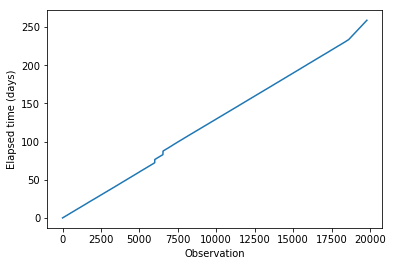

In [214]:
plt.plot(np.array(elapsed_time)/ datetime.timedelta(days = 1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");
plt.show()

plot shows some jumps in the data indicating some observations are further apart from one another than other observations

#### Calculating Daily Mean Speed
- y-axis - mean daily speed
- x-axis time in days

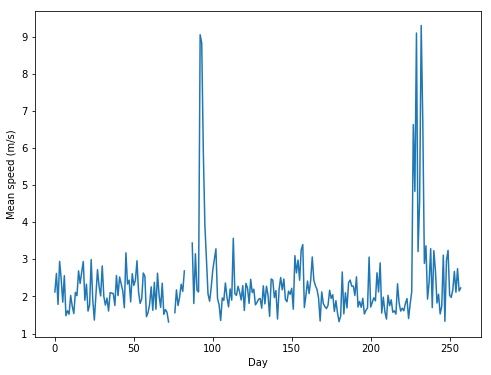

In [215]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1 
inds= []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        # compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1 
        inds = []

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.show()

peaks = migration

In [216]:
birddata.timestamp.min()

Timestamp('2013-08-15 00:01:08')

#### Cartopy
cartographic tools for Python! <br>
http://scitools.org.uk/cartopy/docs/latest/installing.html#installing

In [217]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [218]:
proj = ccrs.Robinson()

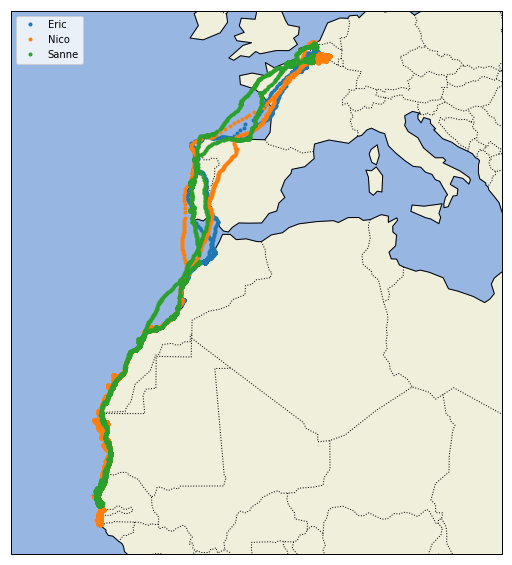

In [219]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
plt.legend(loc="upper left")
plt.show()
# wow!

Text pop up. Import data structure used to store arguments of what to plot in Bokeh.  

In [234]:
# groupby in ("columnname") 
grouped_birds = birddata.groupby("bird_name")
# operations | .mean()
mean_speeds = grouped_birds.speed_2d.mean()
print (mean_speeds)
mean_altitudes = grouped_birds.altitude.mean()
print (mean_altitudes)

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64
bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64


In [240]:
grouped_birds.head(1)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp,date
0,71,2013-08-15 00:18:08,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08,2013-08-15
19795,382,2013-08-15 00:20:45,864,145.179141,50.213455,4.394506,16.482439,Nico,2013-08-15 00:20:45,2013-08-15
40916,55,2013-08-15 00:01:08,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08,2013-08-15


In [241]:
# convert birddata.date_time into a pandas date_time format
birddata.date_time = pd.to_datetime(birddata.date_time)
# Create a new column of day of observation called "date"
birddata["date"] = birddata.date_time.dt.date
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp,date
0,71,2013-08-15 00:18:08,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08,2013-08-15
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07,2013-08-15
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58,2013-08-15
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51,2013-08-15
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42,2013-08-15


In [252]:
# group flight times by date and mean altitude per day
grouped_bydates = birddata.groupby("date")
mean_altitude_perday = grouped_bydates.altitude.mean()
mean_altitude_perday.head()

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
Name: altitude, dtype: float64

In [262]:
# group birdname and date
grouped_birday = birddata.groupby(["bird_name", "date"])
mean_altitude_perday = grouped_birday.altitude.mean()
mean_altitude_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

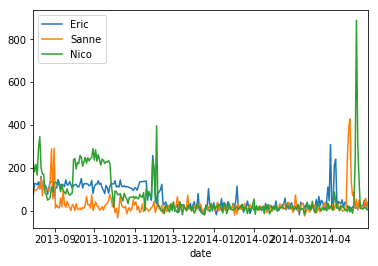

In [272]:
eric_daily_speed  = mean_altitude_perday.Eric
sanne_daily_speed = mean_altitude_perday.Sanne
nico_daily_speed  = mean_altitude_perday.Nico

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [274]:
eric_daily_speed  = mean_speeds.loc[(mean_speeds['bird_name']=="Eric")]
# sanne_daily_speed = mean_speeds.Sanne
# nico_daily_speed  = mean_speeds.Nico

# eric_daily_speed.plot(label="Eric")
# sanne_daily_speed.plot(label="Sanne")
# nico_daily_speed.plot(label="Nico")
# plt.legend(loc="upper left")
# plt.show()

KeyError: 'bird_name'